# **Final Python Notebook 1: Data Understanding and Preprocessing**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the Coursework Dataset
df = pd.read_csv('Coursework Dataset Jan 25 2025 v6.0.csv')

In [3]:
# Displaying first few rows
df.head()

,Patient_ID,Month_of_Birth,Age,Sex,Occupation,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,A0012,12,68.0,Female,Teaching,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,60,Alive
1,A0013,12,50.0,Female,Medical,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,62,Alive
2,A0014,11,58.0,Female,Engineering,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,75,Alive
3,A0015,3,58.0,Female,Technology,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1,84,Alive
4,A0016,1,47.0,Female,Multimedia,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1,50,Alive


In [4]:
# Checking shape and basic info
print("Shape of dataset:", df.shape)
print(df.info())

Shape of dataset: (4024, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              4024 non-null   object 
 1   Month_of_Birth          4024 non-null   int64  
 2   Age                     4015 non-null   float64
 3   Sex                     4020 non-null   object 
 4   Occupation              43 non-null     object 
 5   T_Stage                 4024 non-null   object 
 6   N_Stage                 4024 non-null   object 
 7   6th_Stage               4024 non-null   object 
 8   Differentiated          4024 non-null   object 
 9   Grade                   4024 non-null   int64  
 10  A_Stage                 4024 non-null   object 
 11  Tumor_Size              4021 non-null   float64
 12  Estrogen_Status         4024 non-null   object 
 13  Progesterone_Status     4024 non-null   object 
 14  Regional_No

In [5]:
# Checking missing values
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
Patient_ID                   0
Month_of_Birth               0
Age                          9
Sex                          4
Occupation                3981
T_Stage                      0
N_Stage                      0
6th_Stage                    0
Differentiated               0
Grade                        0
A_Stage                      0
Tumor_Size                   3
Estrogen_Status              0
Progesterone_Status          0
Regional_Node_Examined       1
Reginol_Node_Positive        0
Survival_Months              0
Mortality_Status             0
dtype: int64


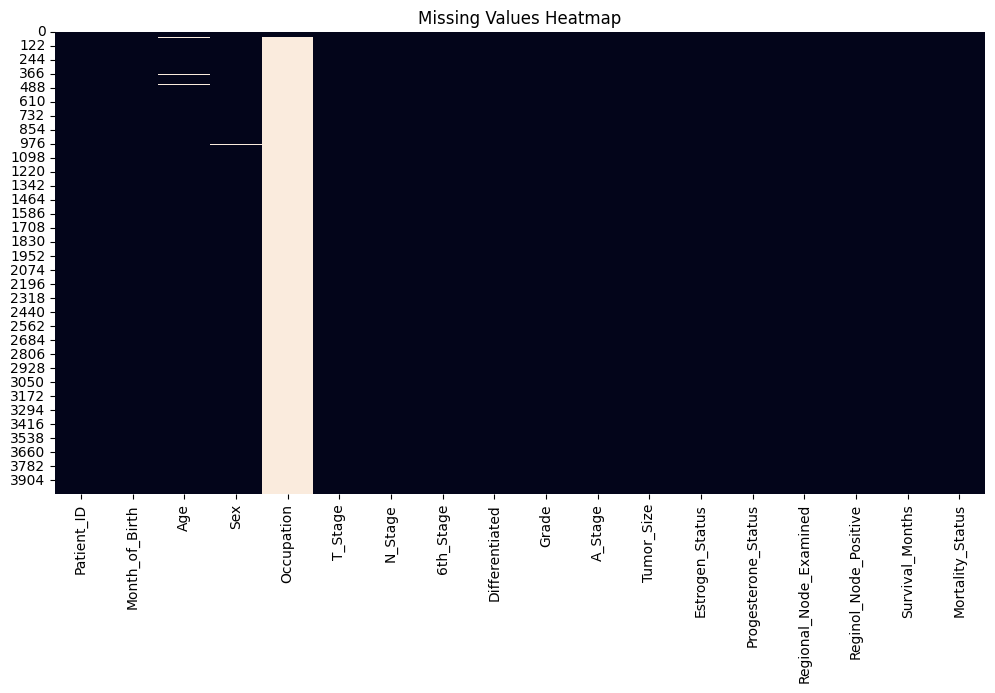

In [6]:
# Visualizing missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

----------Preparing Dataset for Classification Task----------

In [7]:
# Dropping irrelevant columns for Classification (e.g., Patient ID, Month of Birth, Survival Months)
classification_df = df.drop(columns=['Patient_ID', 'Month_of_Birth', 'Survival_Months'])

In [8]:
# Handling missing values
# Filling categorical columns with mode
categorical_cols = classification_df.select_dtypes(include=['object']).columns
classification_df[categorical_cols] = classification_df[categorical_cols].fillna(classification_df[categorical_cols].mode().iloc[0])

In [9]:
# Filling numerical columns with median
numerical_cols = classification_df.select_dtypes(include=['float64', 'int64']).columns
classification_df[numerical_cols] = classification_df[numerical_cols].fillna(classification_df[numerical_cols].median())

In [10]:
# Checking final missing values
print("Missing Values After Cleaning (Classification Dataset):")
print(classification_df.isnull().sum())

Missing Values After Cleaning (Classification Dataset):
Age                       0
Sex                       0
Occupation                0
T_Stage                   0
N_Stage                   0
6th_Stage                 0
Differentiated            0
Grade                     0
A_Stage                   0
Tumor_Size                0
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    0
Reginol_Node_Positive     0
Mortality_Status          0
dtype: int64


----------Preparing Dataset for Regression Task----------

In [11]:
# Dropping irrelevant columns for Regression (e.g., Patient ID, Month of Birth, Mortality Status)
regression_df = df.drop(columns=['Patient_ID', 'Month_of_Birth', 'Mortality_Status'])

In [12]:
# Handling missing values
categorical_cols_reg = regression_df.select_dtypes(include=['object']).columns
regression_df[categorical_cols_reg] = regression_df[categorical_cols_reg].fillna(regression_df[categorical_cols_reg].mode().iloc[0])

numerical_cols_reg = regression_df.select_dtypes(include=['float64', 'int64']).columns
regression_df[numerical_cols_reg] = regression_df[numerical_cols_reg].fillna(regression_df[numerical_cols_reg].median())

In [13]:
# Checking final missing values
print("Missing Values After Cleaning (Regression Dataset):")
print(regression_df.isnull().sum())

Missing Values After Cleaning (Regression Dataset):
Age                       0
Sex                       0
Occupation                0
T_Stage                   0
N_Stage                   0
6th_Stage                 0
Differentiated            0
Grade                     0
A_Stage                   0
Tumor_Size                0
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    0
Reginol_Node_Positive     0
Survival_Months           0
dtype: int64


---------Saving Cleaned Datasets----------

In [14]:
classification_df.to_csv('classification_dataset.csv', index=False)
regression_df.to_csv('regression_dataset.csv', index=False)

print("Classification and Regression datasets are prepared and saved successfully.")

Classification and Regression datasets are prepared and saved successfully.


----------Exploratory Data Analysis----------

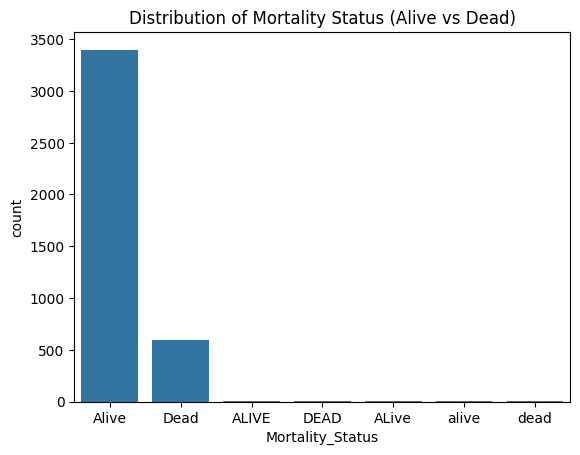

In [15]:
# Distribution of Mortality Status
sns.countplot(x='Mortality_Status', data=classification_df)
plt.title('Distribution of Mortality Status (Alive vs Dead)')
plt.show()

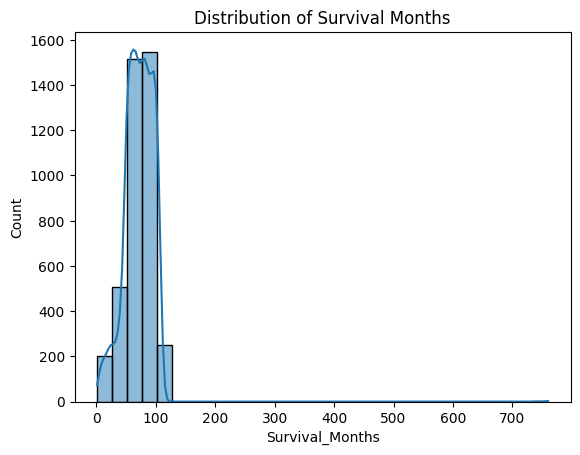

In [16]:
# Distribution of Survival Months
sns.histplot(regression_df['Survival_Months'], kde=True, bins=30)
plt.title('Distribution of Survival Months')
plt.show()